In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

Resource: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification#Testing-the-model

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

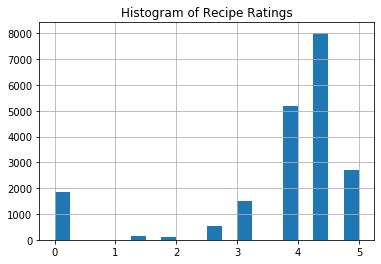

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [10]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [11]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

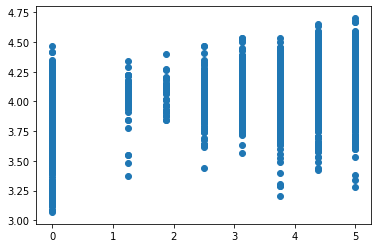

In [12]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [13]:
svr.score(X, Y)

-0.003978314483867873

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

## Try and build a classification model instead of a regression model

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

1.  Remove all 0 ratings
2.  Sample smaller dataset for testing
2.  Create binary classifier (high/low)
2.  Select top 20 attributes with rank_high & rank_low


In [4]:
raw_data.shape

(20052, 680)

In [42]:
# drop all non rated records
df = raw_data[raw_data['rating']> 0]

In [43]:
# resample for smaller subset 
df = df.sample(frac=0.10, replace=True, random_state=1)

In [44]:
df.shape

(1822, 680)

In [45]:
# drop all columns with greater than 90 percent missing
# https://stackoverflow.com/questions/49791246/drop-columns-with-more-than-60-percent-of-empty-values-in-pandas
df = df.loc[:, (df.isin([' ','NULL',0]) | df.isnull()).mean() <= .9]

In [46]:
df.shape

(1822, 33)

In [47]:
df = df.dropna()

In [48]:
df.shape

(1448, 33)

In [49]:
# create categorical variables 
rating_group = pd.cut(df.rating,bins=[0,4,5],labels=[1,2])
df.insert(2,'rating_group',rating_group)

In [50]:
df.head()

,title,rating,rating_group,calories,protein,fat,sodium,bake,bon appétit,dairy free,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
260,My Favorite Roast Turkey,5.000,2,225.0,28.0,10.0,2397.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5693,Blueberry-Buttermilk Bundt Cake,3.750,1,367.0,6.0,13.0,334.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19050,"Spinach, Fennel, and Sausage Stuffing with Toa...",4.375,2,429.0,21.0,26.0,1225.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8575,Chicken with Lemon-Basil Sauce,3.750,1,391.0,55.0,17.0,125.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17971,"Mâche, Parmesan, Pear, and Walnut Salad",4.375,2,291.0,7.0,24.0,240.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
number_low = len(df[df.rating_group == 1])
number_high = len(df[df.rating_group == 2])
#number_high = len(df[df.rating_group == 3])
print('There are only '+ str(number_low) + ' low in records, and ' + str(number_high) +' high records ')

There are only 580 low in records, and 868 high records 


In [52]:
# show the percent total of each segement. May need to consolidate to 2. High and low. 
df['rating_group'].value_counts(normalize=True)

2    0.599448
1    0.400552
Name: rating_group, dtype: float64

# Use a VERY SIMPLE variable selection process based on correlation

In [53]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

In [54]:
rank = df_corr['rating'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='rating',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

In [100]:
df_rank[:20].index.values

array(['rating', 'bon appétit', 'gourmet', 'quick & easy', 'side',
       'milk/cream', 'onion', 'sauté', 'vegetable', 'dinner', 'bake',
       'dessert', 'healthy', 'soy free', 'winter', 'vegetarian',
       'peanut free', 'tree nut free', 'wheat/gluten-free', 'summer'],
      dtype=object)

In [101]:
# filter to the top 10 columns that are correlated with rating
df = df.loc[:, df.columns.isin(['rating_group', 'bon appétit', 'gourmet', 'quick & easy', 'side',
       'milk/cream', 'onion', 'sauté', 'vegetable', 'dinner', 'bake',
       'dessert', 'healthy', 'soy free', 'winter', 'vegetarian',
       'peanut free', 'tree nut free', 'wheat/gluten-free', 'summer'])]

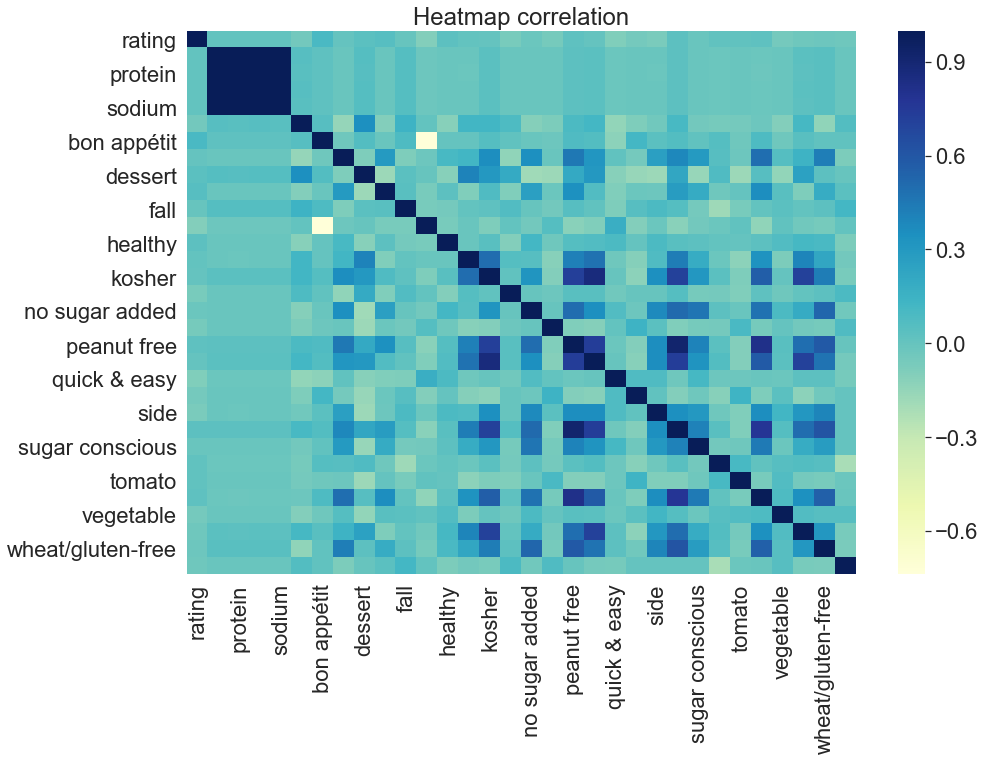

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

# Create training and testings subsets 

In [103]:


train , test = train_test_split(df, test_size = 0.4)

x_train = train.drop(['rating_group'], axis=1)
y_train = train['rating_group']

x_test = test.drop(['rating_group'], axis=1)
y_test = test['rating_group']

In [104]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [105]:
classifier.fit(x_train, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [106]:
prediction_SVM_all = classifier.predict(x_test) #And finally, we predict our data test.

In [107]:
class_names=np.array(['1','2']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [108]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

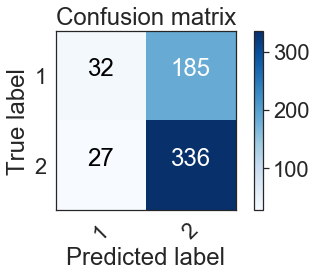

In [109]:

from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [110]:
print('We have detected ' + str(cm[1][1]) + '  / ' + str(cm[1][1]+cm[1][0]) + ' high ratings.')
print('\nSo, the probability to classify high ratings correctly is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("The accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 336  / 363 high ratings.

So, the probability to classify high ratings correctly is 0.9256198347107438
The accuracy is : 0.6344827586206897


# Test if the scale of the predictor variables presents an issue

In [111]:


# rescale 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [112]:
classifier.fit(x_train_scaled, y_train) # Then we train our model, with our balanced data train.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [113]:
prediction_SVM_all = classifier.predict(x_test_scaled) #And finally, we predict our data test.

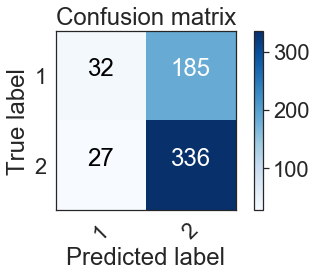

In [114]:
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

No difference after scaling data. So SVM, not sensitive to scale of input variables. 

# Test how re-weighting impacts the results

In [115]:
# Since the predictive accuracy was so lo on the first iteration, try a 60/40 split then 50/50

classifier_b = svm.SVC(kernel='linear',class_weight={1:0.50, 2:0.50})

In [116]:
classifier_b.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 0.5, 2: 0.5}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
prediction_SVM_b_all = classifier_b.predict(x_test) #We predict all the data set.

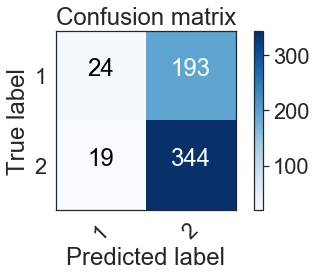

In [118]:
cm = confusion_matrix(y_test, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [119]:
print('We have detected ' + str(cm[1][1]) + '  / ' + str(cm[1][1]+cm[1][0]) + ' high ratings.')
print('\nSo, the probability to classify high ratings correctly is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("The accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 344  / 363 high ratings.

So, the probability to classify high ratings correctly is 0.9476584022038568
The accuracy is : 0.6344827586206897
